# **Libraries:**
---

In [66]:
import math
import time
import networkx as nx
import matplotlib.pyplot as plt

# **Implementing the basic operations for Binary Search Trees (BSTs):**
---

Key operations:


- **Search:**  
  Implements the recursive $bstsearch$ algorithm. For a given node $x$ and value $v$, it compares using:
  - If $v < x.\text{key}$, search in the left subtree.
  - If $v > x.\text{key}$, search in the right subtree.
  - Otherwise, $v$ is found.


- **Minimum & Maximum:**  
  - $bstmin(t)$ recursively finds the leftmost node (minimum).  
  - $bstmax(t)$ recursively finds the rightmost node (maximum).


- **Successor & Predecessor:**  
  - $bstsucc(x)$ returns the minimum node from $x.\text{right}$ if available.
  - $bstpred(x)$ returns the maximum node from $x.\text{left}$ if available.


- **Insertion:**  
  $bstinsert(t,v)$ inserts a new node by comparing $v$ with the current node's key and recursively descending into the left or right subtree, following:
  $$ v < x.\text{key} \quad \text{or} \quad v > x.\text{key} $$


- **Deletion:**  
  $bstdelete(t,v)$ handles three cases:
  1. **Leaf Node:** Replace with $NIL$.
  2. **One Child:** Replace with its non-$NIL$ child.
  3. **Two Children:** Replace $x$ with its successor $y$, where:
     $$ y = bstmin(x.\text{right}) $$


In [67]:
def create_node(key):
    return {'key': key, 'left': None, 'right': None}

def bst_search(t, v):
    if t is None:
        return None, f"Value {v} not found."
    if v < t['key']:
        if t['left'] is None:
            return None, f"Value {v} not found."
        return bst_search(t['left'], v)
    elif v > t['key']:
        if t['right'] is None:
            return None, f"Value {v} not found."
        return bst_search(t['right'], v)
    else:
        return t, f"Found {v} at node with key {t['key']}."

def bst_min(t):
    if t is None:
        return None
    if t['left'] is not None:
        return bst_min(t['left'])
    return t

def bst_max(t):
    if t is None:
        return None
    if t['right'] is not None:
        return bst_max(t['right'])
    return t

def bst_succ(t):
    if t is None:
        return None
    if t['right'] is not None:
        return bst_min(t['right'])
    return t

def bst_pred(t):
    if t is None:
        return None
    if t['left'] is not None:
        return bst_max(t['left'])
    return t

def bst_insert(t, v):
    if t is None:
        return create_node(v)
    if v < t['key']:
        t['left'] = bst_insert(t['left'], v)
    elif v > t['key']:
        t['right'] = bst_insert(t['right'], v)
    return t

def bst_delete(t, v):
    if t is None:
        return None
    if v < t['key']:
        t['left'] = bst_delete(t['left'], v)
    elif v > t['key']:
        t['right'] = bst_delete(t['right'], v)
    else:
        if t['left'] is None and t['right'] is None:
            return None
        if t['left'] is None:
            return t['right']
        if t['right'] is None:
            return t['left']
        succ = bst_min(t['right'])
        t['key'] = succ['key']
        t['right'] = bst_delete(t['right'], succ['key'])
    return t

def build_graph(t, G=None):
    if G is None:
        G = nx.DiGraph()
    if t is None:
        return G
    G.add_node(id(t), label=t['key'])
    if t['left'] is not None:
        G.add_edge(id(t), id(t['left']))
        build_graph(t['left'], G)
    if t['right'] is not None:
        G.add_edge(id(t), id(t['right']))
        build_graph(t['right'], G)
    return G

def tree_positions(t, pos=None, x_pos=[0], y=0):
    if pos is None:
        pos = {}
    if t is None:
        return pos
    tree_positions(t['left'], pos, x_pos, y - 1)
    pos[id(t)] = (x_pos[0], y)
    x_pos[0] += 1
    tree_positions(t['right'], pos, x_pos, y - 1)
    return pos

def draw_bst(t, title="Binary Search Tree"):
    if t is None:
        print("Empty tree.")
        return
    G = build_graph(t)
    pos = tree_positions(t, y=0)
    labels = nx.get_node_attributes(G, 'label')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, arrows=False, node_color="lightblue", node_size=1200, font_size=10)
    plt.title(title)
    plt.axis('off')
    plt.show()

def inorder(t):
    if t is None:
        return
    inorder(t['left'])
    print(t['key'], end=" ")
    inorder(t['right'])


I have also build a directed graph of the BST using `NetworkX` package:
- **Graph Construction:**  
  The function $build\_graph(t)$ adds nodes and edges (using $id(node)$ as unique identifier).
  
- **Node Positioning:**  
  $tree\_positions(t)$ assigns positions based on an in-order traversal so that $x$-coordinates are sorted and the $y$-coordinate reflects the depth (with the root at $y = 0$).

- **Drawing:**  
  $draw\_bst(t)$ uses matplotlib to show the tree diagram with node labels and a clear layout.


Inorder traversal of initial BST:
0 1 2 3 4 5 6 
Displaying initial BST...


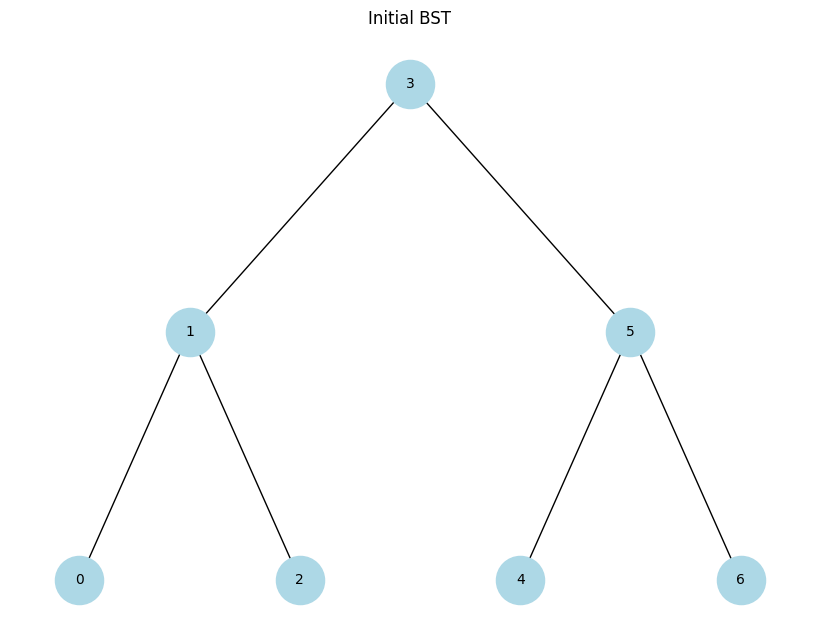

Found 4 at node with key 4.
Value 7 not found.
Minimum: 0
Maximum: 6
Successor of 3: 4
Predecessor of 3: 2
Inorder after deleting 5:
0 1 2 3 4 6 
Inorder after deleting 3:
0 1 2 4 6 
Displaying final BST...


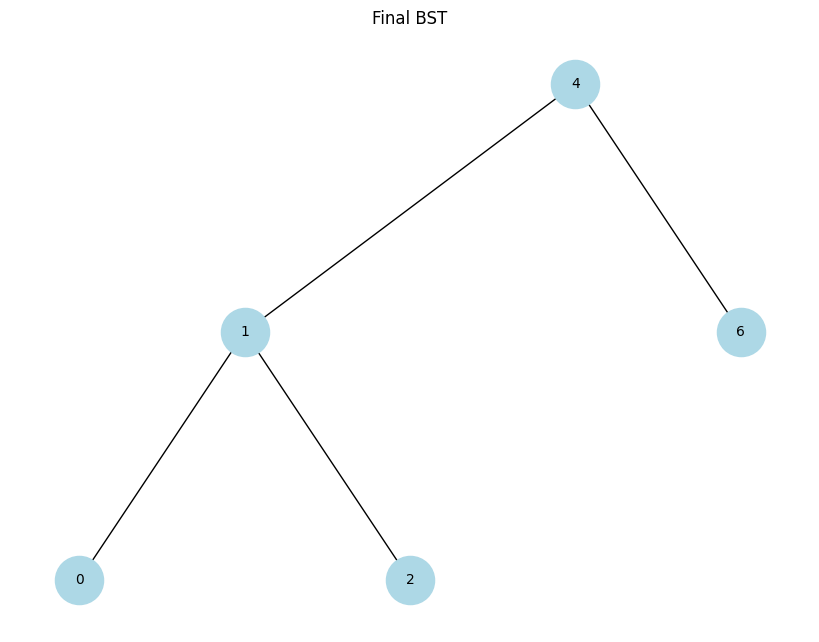

In [68]:
if __name__ == "__main__":
    bst = None
    values_to_insert = [3, 1, 5, 0, 2, 4, 6]
    for v in values_to_insert:
        bst = bst_insert(bst, v)
    print("Inorder traversal of initial BST:")
    inorder(bst)
    print("\nDisplaying initial BST...")
    draw_bst(bst, title="Initial BST")
    
    node, msg = bst_search(bst, 4)
    print(msg)
    node, msg = bst_search(bst, 7)
    print(msg)
    
    min_node = bst_min(bst)
    max_node = bst_max(bst)
    print(f"Minimum: {min_node['key'] if min_node else None}")
    print(f"Maximum: {max_node['key'] if max_node else None}")
    
    node, _ = bst_search(bst, 3)
    if node:
        succ = bst_succ(node)
        pred = bst_pred(node)
        print(f"Successor of 3: {succ['key']}")
        print(f"Predecessor of 3: {pred['key']}")
    
    bst = bst_delete(bst, 5)
    print("Inorder after deleting 5:")
    inorder(bst)
    print()
    
    bst = bst_delete(bst, 3)
    print("Inorder after deleting 3:")
    inorder(bst)
    print("\nDisplaying final BST...")
    draw_bst(bst, title="Final BST")